# Example for simple linear regression 

# 1. Understand the data
To understand the data,first import the data and the required libraries.

In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings
import os
print(os.listdir("../input"))


['tvmarketing.csv']


In [2]:
#import and read data set
data = pd.read_csv('../input//tvmarketing.csv')
data.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
#look for more information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
#look up the statistics of the numeric data 
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [5]:
#check the shape of data
data.shape

(200, 2)

Till now, we understood that the data set consists of only 2 columns i.e, 'TV' and 'Sales'. And we have a total of 200 entries. We have to predict Sales using  Tv as predictor value. So let's analyse more about the data set by visualizing it.

# 2. Visualizing the data

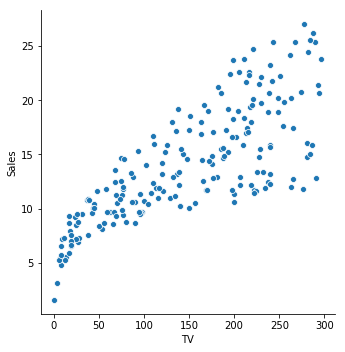

In [6]:
sns.pairplot(data, x_vars='TV', y_vars='Sales', height=5,  kind='scatter' )

# Perform Simple Linear Regression

Formula for SLR is y = mx+c
    where, y = response
           m = coefficient of feature x
           c = intercept
           
In our case, y = m*TV +c. 
The  m  values are called the model coefficients or model parameters.

# 3. Build model using sklearn

In [7]:
# Putting feature variable to X
X = data['TV']
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [8]:
#Putting response variavle to y
y = data['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

Split data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [10]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [12]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.
import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


## Perform Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate codefficients

In [15]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.98966585741168
[0.04649736]


Now we have y = 0.04610976 x TV + 7.113008222196273

## Predictions

In [16]:
y_pred = lr.predict(X_test)

## Compute RMSE AND R^2

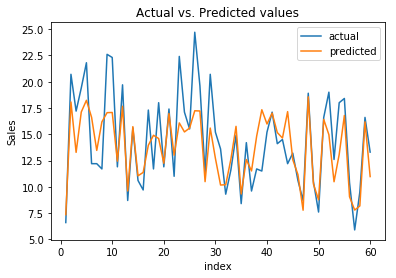

In [17]:
#check actual and predicted values
c = [number for number in range(1,61,1)] #generate index
fig = plt.figure()
plt.plot(c, y_test, label='actual')
plt.plot(c, y_pred, label='predicted')
plt.title('Actual vs. Predicted values')
plt.xlabel('index')
plt.ylabel('Sales')
plt.legend()

## Error

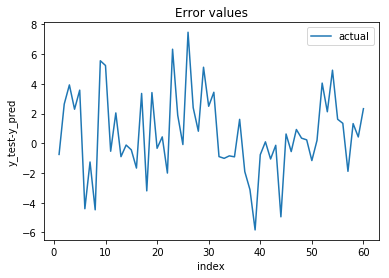

In [18]:
fig = plt.figure()
plt.plot(c, y_test-y_pred, label='actual')
plt.title('Error values')
plt.xlabel('index')
plt.ylabel('y_test-y_pred')
plt.legend()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [20]:
r_squared = r2_score(y_test, y_pred)

In [21]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.975798532854851
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Predicted Y')

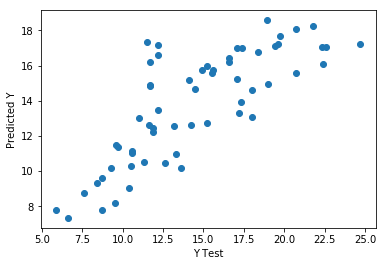

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')